# Recess Time!!

In [4]:
import numpy as np
import tensorflow as tf
import pprint

pp = pprint.PrettyPrinter(indent=4)

## Simple Array

In [7]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
pp.pprint(t)
print(t.ndim)
print(t.shape)
print(t[0], t[2:5], t[::-1])

array([0., 1., 2., 3., 4., 5., 6.])
1
(7,)
0.0 [2. 3. 4.] [6. 5. 4. 3. 2. 1. 0.]


## 2D Array

In [8]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
pp.pprint(t)
print(t.ndim) # rank
print(t.shape) # shape

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])
2
(4, 3)


## Shape, Rank, Axis

In [20]:
t = tf.constant([1,2,3,4])
tf.shape(t).numpy()

array([4], dtype=int32)

In [21]:
t = tf.constant([[1,2],[3,4]])
tf.shape(t).numpy()

array([2, 2], dtype=int32)

In [19]:
t = tf.constant([
    [
        [
            [1, 2, 3, 4], 
            [5, 6, 7, 8], 
            [9, 10, 11, 12]
        ],
        [
            [13, 14, 15, 16], 
            [17, 18, 19, 20], 
            [21, 22, 23, 24]
        ]
    ]
])
tf.shape(t).numpy()

array([1, 2, 3, 4], dtype=int32)

## Matmul VS multiply

In [22]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
tf.matmul(matrix1, matrix2).numpy() # 내적

array([[12.]], dtype=float32)

In [23]:
(matrix1*matrix2).numpy() # 외적

array([[6., 6.],
       [6., 6.]], dtype=float32)

## Watch out broadcasting

In [26]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
(matrix1+matrix2).numpy()

array([[5., 5.],
       [5., 5.]], dtype=float32)

In [27]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2., 2.]])
(matrix1+matrix2).numpy()

array([[5., 5.]], dtype=float32)

## Random values for variable initializations

In [30]:
tf.random.normal([3]).numpy(), tf.random.uniform([3]).numpy()

(array([ 0.57778305, -0.42468554,  1.1025426 ], dtype=float32),
 array([0.8720336 , 0.4109099 , 0.02267039], dtype=float32))

(array([ 1.,  5.,  6.,  7., 18., 22., 17., 13.,  6.,  5.]),
 array([-2.60116863, -2.1353693 , -1.66956973, -1.20377028, -0.73797083,
        -0.27217138,  0.19362807,  0.65942752,  1.12522697,  1.59102643,
         2.05682588]),
 <BarContainer object of 10 artists>)

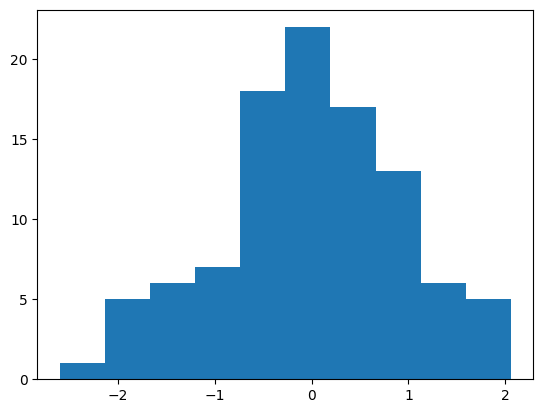

In [33]:
import matplotlib.pyplot as plt

plt.hist(tf.random.normal([100]).numpy())

(array([13., 13., 10.,  8.,  8., 14.,  9.,  9.,  9.,  7.]),
 array([1.82747841e-04, 9.66465473e-02, 1.93110347e-01, 2.89574146e-01,
        3.86037946e-01, 4.82501745e-01, 5.78965545e-01, 6.75429344e-01,
        7.71893144e-01, 8.68356943e-01, 9.64820743e-01]),
 <BarContainer object of 10 artists>)

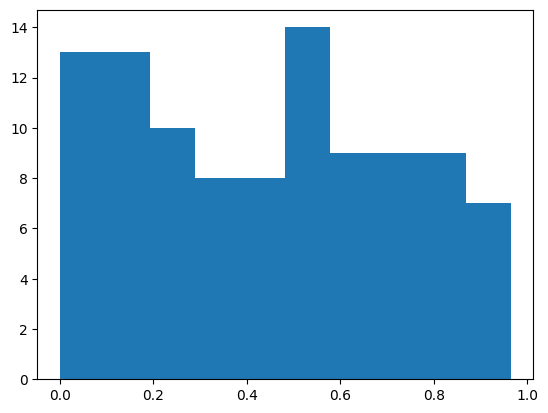

In [34]:
plt.hist(tf.random.uniform([100]).numpy())

## Reduce Mean/Sum

In [36]:
tf.reduce_mean([1, 2], axis=0).numpy()

1

In [37]:
x = [[1., 2.],
     [3., 4.]]


tf.reduce_mean(x).numpy()

2.5

In [38]:
tf.reduce_mean(x, axis=0).numpy()

array([2., 3.], dtype=float32)

In [39]:
tf.reduce_mean(x, axis=1).numpy()

array([1.5, 3.5], dtype=float32)

In [40]:
tf.reduce_sum(x, axis=0).numpy()

array([4., 6.], dtype=float32)

## One hot

In [43]:
tf.one_hot([1,2,3,4], depth=10)

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

## casting

In [44]:
tf.cast([1.8, 2.2, 3.3, 4.9], tf.int32).numpy()

array([1, 2, 3, 4], dtype=int32)

In [45]:
tf.cast([True, False, 1 == 1, 0 == 1], tf.int32).numpy()

array([1, 0, 1, 0], dtype=int32)

## Stack

In [46]:
x = [1,4]
y = [2,5]
z = [3,6]

tf.stack([x,y,z]).numpy()

array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int32)

In [47]:
tf.stack([x,y,z], axis=1)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

## Ones like and Zeros like

In [48]:
x = [[0, 1, 2],
     [2, 1, 0]]

tf.ones_like(x).numpy()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

## Transpose

In [49]:
t = np.array([[[0, 1, 2], [3, 4, 5]], [[6, 7, 8], [9, 10, 11]]])
pp.pprint(t.shape)
pp.pprint(t)

(2, 2, 3)
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])


In [51]:
t1 = tf.transpose(t)
pp.pprint(t1.shape)
pp.pprint(t1)

TensorShape([3, 2, 2])
<tf.Tensor: shape=(3, 2, 2), dtype=int64, numpy=
array([[[ 0,  6],
        [ 3,  9]],

       [[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]]])>


In [55]:
t2 = tf.transpose(t, [2, 0, 1])
pp.pprint(t2.shape)
pp.pprint(t2)

TensorShape([3, 2, 2])
<tf.Tensor: shape=(3, 2, 2), dtype=int64, numpy=
array([[[ 0,  3],
        [ 6,  9]],

       [[ 1,  4],
        [ 7, 10]],

       [[ 2,  5],
        [ 8, 11]]])>
